In [4]:
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt

In [5]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 5.0
dt = 1.0e-2
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

training_params = np.arange(80,121,5)
print("nt={}".format(nt))
print("training parameters={}".format(training_params))

file_name_SVD="./wave_model/ex23_SVD.p"
print(file_name_SVD)

nt=500
training parameters=[ 80  85  90  95 100 105 110 115 120]
./wave_model/ex23_SVD.p


In [6]:
# load snapshot
snapshot = np.array([])
for i in training_params:
    ex = np.load('./wave_data/ex23_interp_{}.npz'.format(i), allow_pickle = True)
    ex = ex.f.arr_0
    snapshot = np.append(snapshot, ex)
snapshot = snapshot.reshape(len(training_params)*(nt+1),-1)
print('data shape \t {}'.format(snapshot.shape))
print('data dtype \t {}'.format(snapshot.dtype))

snapshot_u = np.copy(snapshot)

# do svd decomposition
U_u,S_u,V_uT=np.linalg.svd(snapshot_u.T,full_matrices=False)

# save SVD
SVD={'U':U_u,'S':S_u,'VT':V_uT}
with open(file_name_SVD,'wb') as ff:
    pickle.dump(SVD,ff)

data shape 	 (4509, 3600)
data dtype 	 float64


# of POD Basis: [3 4 5 6]
./wave_result/ex23_POD_3_proj_result.p
accuracy: 99.78361275195937
./wave_result/ex23_POD_4_proj_result.p
accuracy: 99.92305011776989
./wave_result/ex23_POD_5_proj_result.p
accuracy: 99.98708396949407
./wave_result/ex23_POD_6_proj_result.p
accuracy: 99.99278442790673


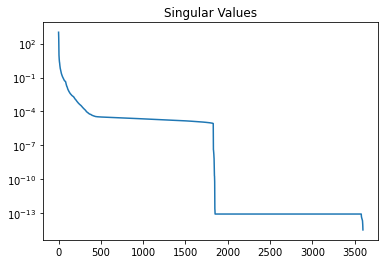

In [7]:
# file path
file_name_SVD="./wave_model/ex23_SVD.p"

basis_list=np.array([3,4,5,6])
print("# of POD Basis:",basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]

    # file path
    file_path_prj_result = "./wave_result/ex23_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]
    S_u=SVD['S']

    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))
    
plt.figure()
plt.semilogy(S_u)
plt.title("Singular Values")
# plt.show()
plt.savefig("./wave_result/ex23_SVD.png")

# Projection error

In [5]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
import time, sys
import pickle

In [6]:
# Given parameters
nx = 60
ny = 60
tf = 5.0
dt = 1.0e-2
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
free_multi_index=(multi_index_j[1:-1,1:-1].flatten(),multi_index_i[1:-1,1:-1].flatten())
x0_multi_index=(multi_index_j[1:-1,0].flatten(),multi_index_i[1:-1,0].flatten())
x1_multi_index=(multi_index_j[1:-1,-1].flatten(),multi_index_i[1:-1,-1].flatten())
y0_multi_index=(multi_index_j[0,1:-1].flatten(),multi_index_i[0,1:-1].flatten())
y1_multi_index=(multi_index_j[-1,1:-1].flatten(),multi_index_i[-1,1:-1].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
free_raveled_indicies=np.ravel_multi_index(free_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
x01_raveled_indicies=np.concatenate((x0_raveled_indicies,x1_raveled_indicies))
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
y01_raveled_indicies=np.concatenate((y0_raveled_indicies,y1_raveled_indicies))
fixed_raveled_indicies=np.setdiff1d(full_raveled_indicies,free_raveled_indicies)

# measurements
msmt_idx=full_raveled_indicies

./wave_model/ex23_SVD.p
[3 4 5 6]

POD basis: 3
./wave_result/ex23_POD_3_proj_result.p


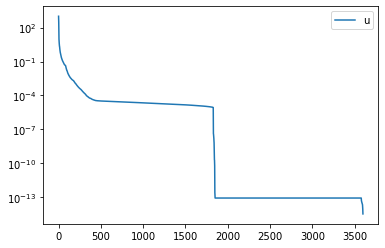

accuracy: 99.78361275195937

Time elapsed: 0.6388671398162842 sec
average relative error of u: 2.616559554990158%
maximum relative error of u: 3.9008110900660067%

Time elapsed: 0.6824448108673096 sec
average relative error of u: 3.087478370208631%
maximum relative error of u: 4.709292074958395%

Time elapsed: 0.8598394393920898 sec
average relative error of u: 4.148446238139219%
maximum relative error of u: 7.150700150902803%

Time elapsed: 0.9533686637878418 sec
average relative error of u: 5.526581694086647%
maximum relative error of u: 10.170048765663124%

Time elapsed: 0.9202041625976562 sec
average relative error of u: 7.076720791289544%
maximum relative error of u: 13.453843188626537%

Time elapsed: 0.8805394172668457 sec
average relative error of u: 8.732097166277503%
maximum relative error of u: 16.927115432210993%

Time elapsed: 0.9583594799041748 sec
average relative error of u: 10.457919272763064%
maximum relative error of u: 20.551637740571426%

Time elapsed: 0.75707030296

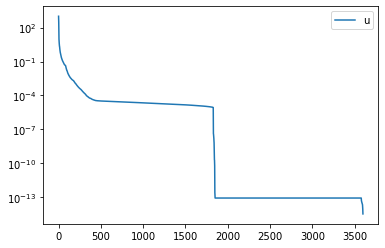

accuracy: 99.92305011776989

Time elapsed: 0.6255700588226318 sec
average relative error of u: 2.565565246285895%
maximum relative error of u: 3.8610113748185286%

Time elapsed: 0.7529642581939697 sec
average relative error of u: 2.60449402762705%
maximum relative error of u: 4.034160813195197%

Time elapsed: 0.654740571975708 sec
average relative error of u: 3.024015066309883%
maximum relative error of u: 5.182547013164302%

Time elapsed: 0.636497974395752 sec
average relative error of u: 3.7640580098065377%
maximum relative error of u: 7.128261299426464%

Time elapsed: 0.7720475196838379 sec
average relative error of u: 4.724004228388313%
maximum relative error of u: 9.453708256193618%

Time elapsed: 0.718040943145752 sec
average relative error of u: 5.8311330230407075%
maximum relative error of u: 12.02905847186447%

Time elapsed: 0.7291414737701416 sec
average relative error of u: 7.041587791214354%
maximum relative error of u: 14.794421773280906%

Time elapsed: 0.7135405540466309 

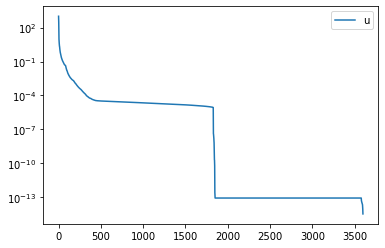

accuracy: 99.98708396949407

Time elapsed: 0.926588773727417 sec
average relative error of u: 2.5530407790189313%
maximum relative error of u: 3.840230643730369%

Time elapsed: 0.9711794853210449 sec
average relative error of u: 2.3562683430370055%
maximum relative error of u: 3.562725592005933%

Time elapsed: 0.8209891319274902 sec
average relative error of u: 2.1715243673259383%
maximum relative error of u: 3.3058686693231962%

Time elapsed: 0.7970616817474365 sec
average relative error of u: 2.0041764890911375%
maximum relative error of u: 3.0801199973693736%

Time elapsed: 0.9076032638549805 sec
average relative error of u: 1.8599674764743872%
maximum relative error of u: 2.898733705739022%

Time elapsed: 0.9085102081298828 sec
average relative error of u: 1.7455306809598492%
maximum relative error of u: 2.771904557285882%

Time elapsed: 1.0162625312805176 sec
average relative error of u: 1.668585189519235%
maximum relative error of u: 2.7160885539444535%

Time elapsed: 0.803276538

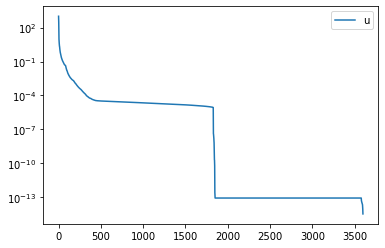

accuracy: 99.99278442790673

Time elapsed: 0.8806087970733643 sec
average relative error of u: 1.797498910339807%
maximum relative error of u: 2.468650307703458%

Time elapsed: 0.8633639812469482 sec
average relative error of u: 1.6718214482439806%
maximum relative error of u: 2.305183834921851%

Time elapsed: 0.9677081108093262 sec
average relative error of u: 1.5475195161179172%
maximum relative error of u: 2.1493770534037897%

Time elapsed: 0.791898250579834 sec
average relative error of u: 1.4286806223674542%
maximum relative error of u: 2.0027240539629307%

Time elapsed: 0.8268368244171143 sec
average relative error of u: 1.3205078585331824%
maximum relative error of u: 1.8770484731495471%

Time elapsed: 0.7058596611022949 sec
average relative error of u: 1.2299974339551525%
maximum relative error of u: 1.785423978284459%

Time elapsed: 0.760094165802002 sec
average relative error of u: 1.1663293572072493%
maximum relative error of u: 1.7433594478981629%

Time elapsed: 0.807208061

In [7]:
# file path
file_name_SVD="./wave_model/ex23_SVD.p"
print(file_name_SVD)

basis_list=np.array([3,4,5,6])
print(basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]
    print("")
    print("POD basis: {}".format(POD_basis))

    # file path
    file_path_prj_result = "./wave_result/ex23_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]

    plt.figure()
    plt.semilogy(S_u)
    plt.legend('u')
    plt.show()
    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)

    results={'avg_rel_err':[],'rel_err':[],'elapsed_time':[]}

    for FOM_parameter in training_params:
        # Load FOM solution
        ex = np.load('./wave_data/ex23_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print()
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))

        # save result
        results['avg_rel_err'].append(u_avg_rel_err)
        results['rel_err'].append(u_rel_err_gappyPOD)
        results['elapsed_time'].append(t_elapsed_gappyPOD)

    results['avg_rel_err']=np.array(results['avg_rel_err'])
    results['rel_err']=np.array(results['rel_err'])
    results['elapsed_time']=np.array(results['elapsed_time'])

    with open(file=file_path_prj_result, mode='wb') as ff:
        pickle.dump(results, ff)

# Plot other cases together

In [6]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title

linestyle=['solid','dotted','dashed','dashdot']

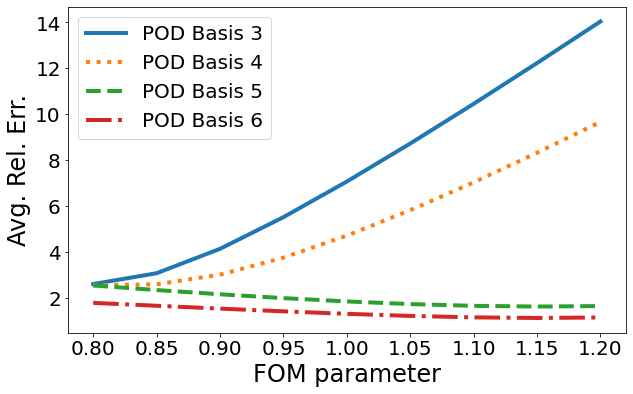

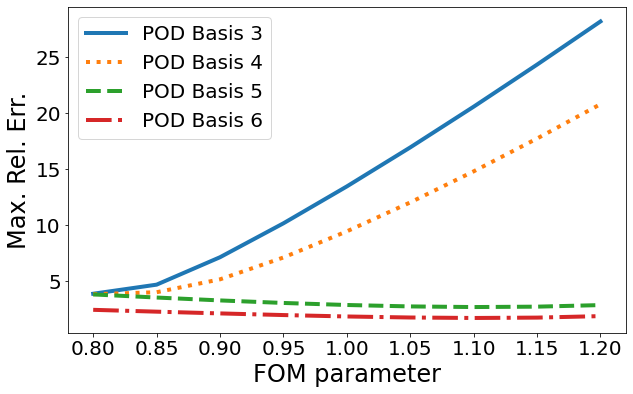

In [7]:
basis_list=np.array([3,4,5,6])

plt.figure(num=1,figsize=(10,6))
plt.figure(num=2,figsize=(10,6))
for i in range(len(basis_list)):
    POD_basis = basis_list[i]
    file_path_prj_result = "./wave_result/ex23_POD_"+str(POD_basis)+"_proj_result.p"
    with open(file=file_path_prj_result, mode='rb') as ff:
        results=pickle.load(ff)   
    plt.figure(num=1)
    plt.plot(training_params/100,results['avg_rel_err'],linestyle=linestyle[i],linewidth=4)

    plt.figure(num=2)
    plt.plot(training_params/100,results['rel_err'].max(axis=1),linestyle=linestyle[i],linewidth=4)

plt.figure(num=1)    
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./wave_result/ex23_POD_proj_avg_rel_err.png")

plt.figure(num=2)
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./wave_result/ex23_POD_proj_max_rel_err.png")

In [9]:
print(basis_list)
print(training_params)

[3 4 5 6]
[ 80  85  90  95 100 105 110 115 120]


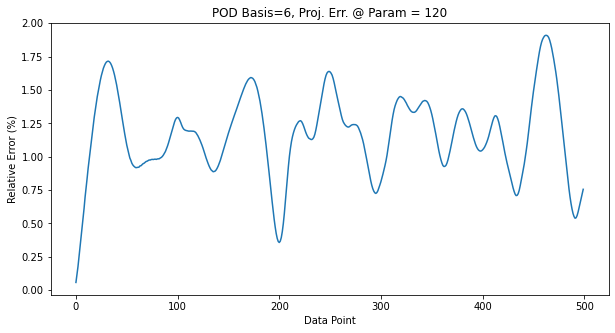

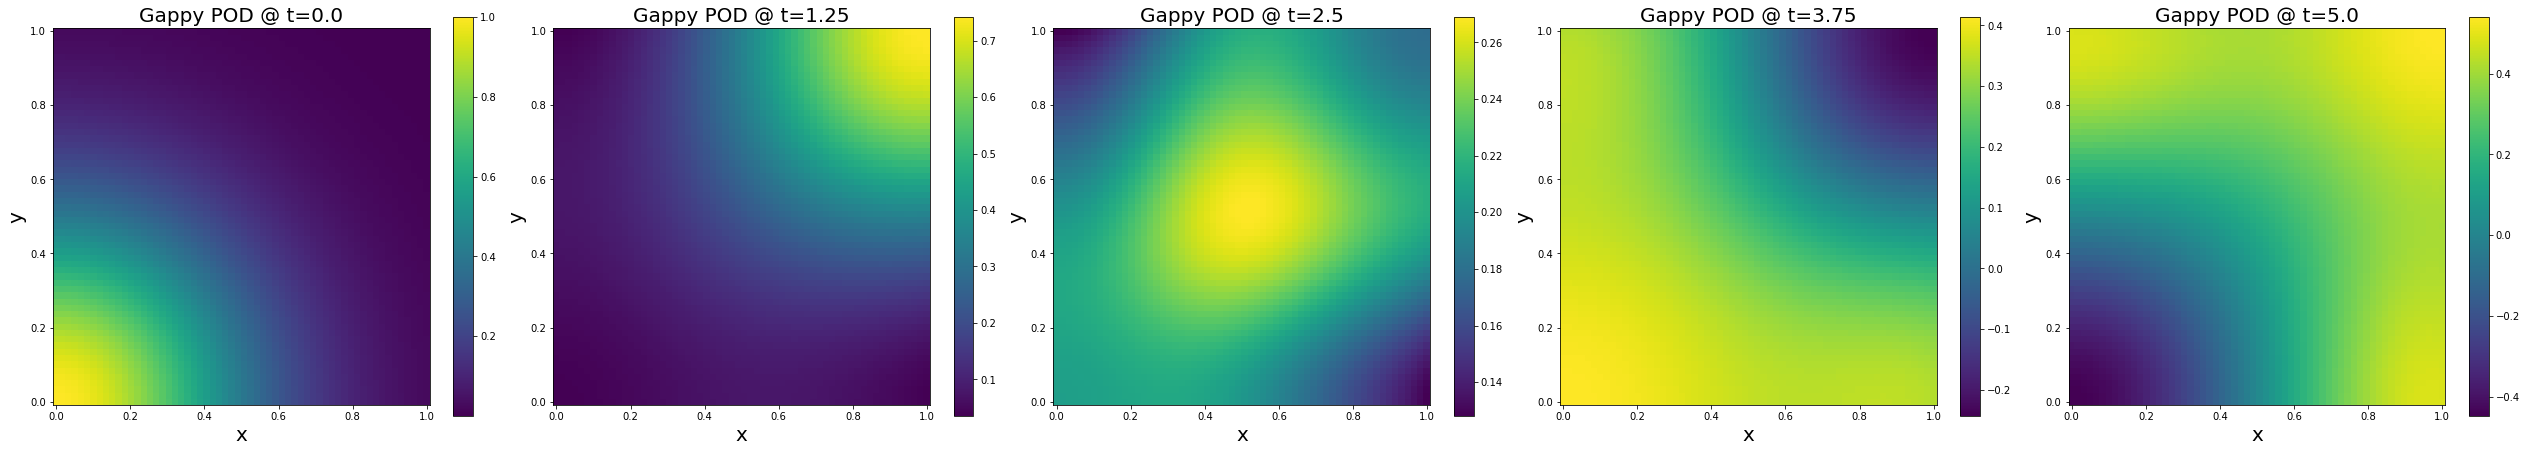

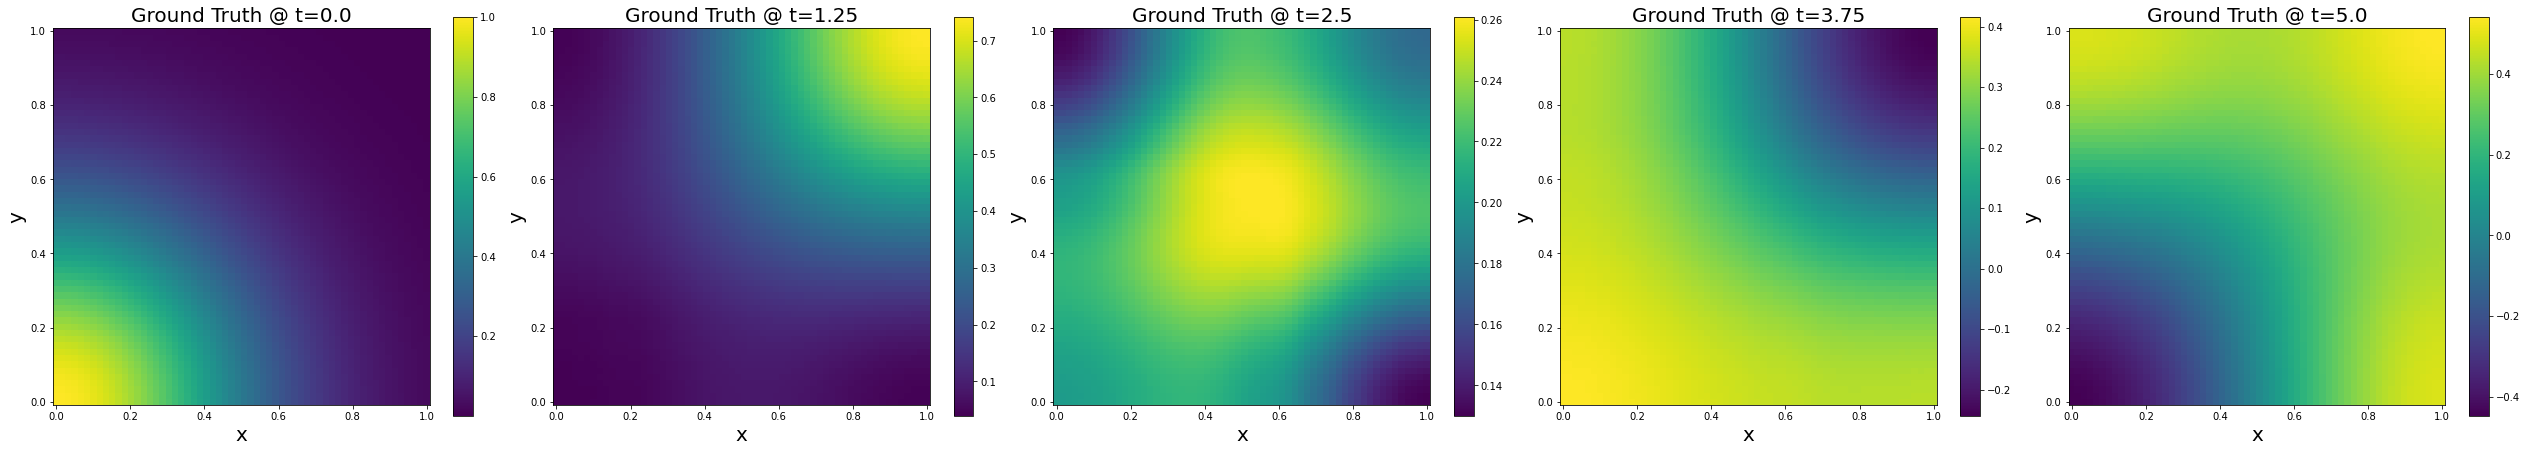

In [16]:
i=3; j=-1        
POD_basis=basis_list[i]
param=training_params[j]

file_path_prj_result = "./wave_result/ex23_POD_"+str(POD_basis)+"_proj_result.p"
with open(file=file_path_prj_result, mode='rb') as ff:
    results=pickle.load(ff)  

u_rel_err_gappyPOD=results['rel_err'][j,1:]
plt.figure(figsize=(10,5))

plt.plot(u_rel_err_gappyPOD.flatten())
plt.xlabel('Data Point')
plt.ylabel('Relative Error (%)')
plt.title('POD Basis={}, Proj. Err. @ Param = {}'.format(POD_basis,param))
plt.show()

# plot original data (last case of projection error)
vmin=-1; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
plt.show()